# The Classic Iris Dataset 

Evaluate manual and logistic regression models

Project Data Science (projectdatascience.com)

Steven Ponce / Jan 2021


# Notebook Setup

In [1]:
# Clear  variables before script runs
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [2]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
%load_ext autoreload   
%autoreload 2
%matplotlib inline

In [4]:
# standard import
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Local imports


In [5]:
# update to seaborn plotting style
sns.set()

# Load data
Let's load the Iris flower dataset using scikit-learn's build-in datasets.

In [6]:
data = datasets.load_iris()

In [7]:
# dictionary - 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
# examining DESCR data
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
# examining 'data' - first 5 rows
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
# examining column names
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# What problem are we trying to solve?
We are trying to use attibutes of flowers to predict the species of the flower. Specifically, we are trying to use the sepal length and width and the petal lengthand width to predict if an Iris flower is of type Setosa, Versicolor, or Virginica.

This is a multiclassification problem.

# Create a pandas DataFrame from the data 
Using pandas DataFrames to get some practice using pandas

In [13]:
df = pd.DataFrame(data['data'], columns=data["feature_names"])

In [14]:
df['target'] = data['target']

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of features and target

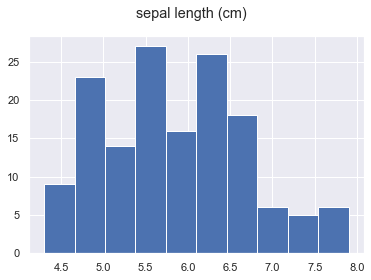

In [17]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

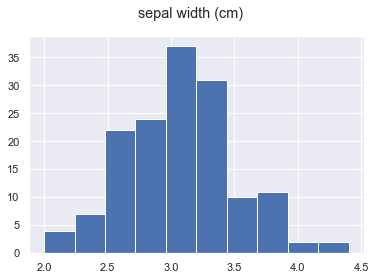

In [18]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

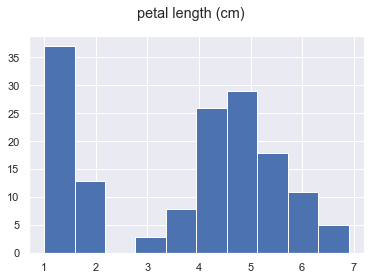

In [19]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

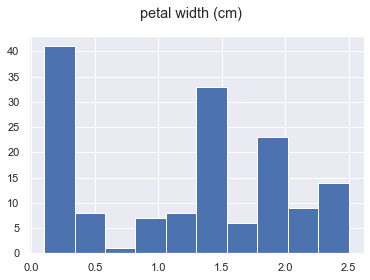

In [20]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of the data features with the target

In [21]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


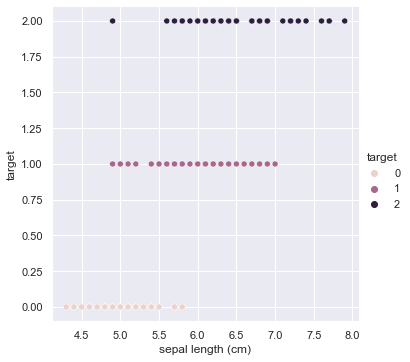

In [23]:
# Univariate analysis

col = 'sepal length (cm)'
sns.relplot(x=col, y='target', hue='target', data=df)

In [24]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# create new column with species names
df['target_names'] = df['target'].map({0: "setosa", 1: 'versisolor', 2: 'virginica'})

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


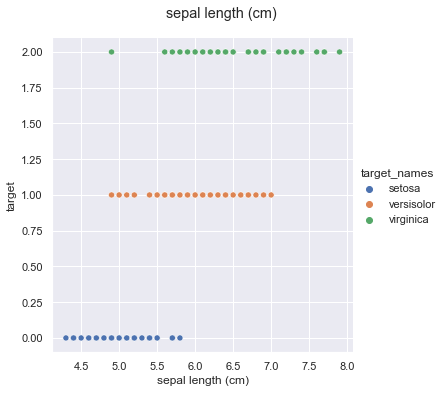

In [27]:
# Univariate analysis

col = 'sepal length (cm)'
sns.relplot(x=col, y='target', hue='target_names', data=df)
_ = plt.suptitle(col, y=1.05)


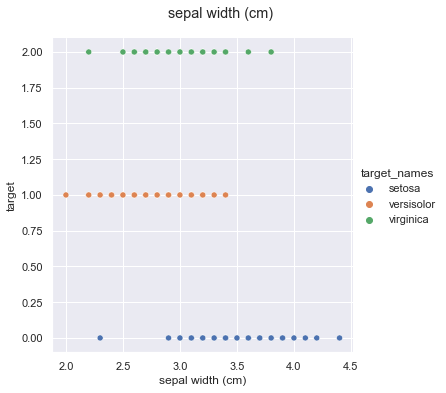

In [28]:
col = 'sepal width (cm)'
sns.relplot(x=col, y='target', hue='target_names', data=df)
_ = plt.suptitle(col, y=1.05)

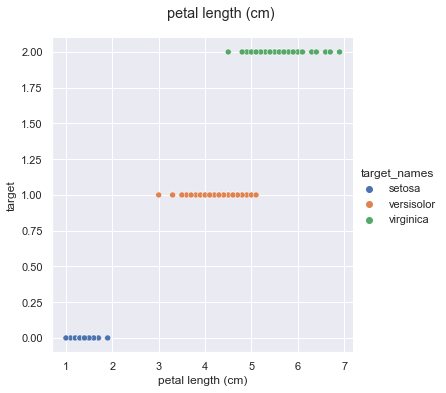

In [29]:
col = 'petal length (cm)'
sns.relplot(x=col, y='target', hue='target_names', data=df)
_ = plt.suptitle(col, y=1.05)

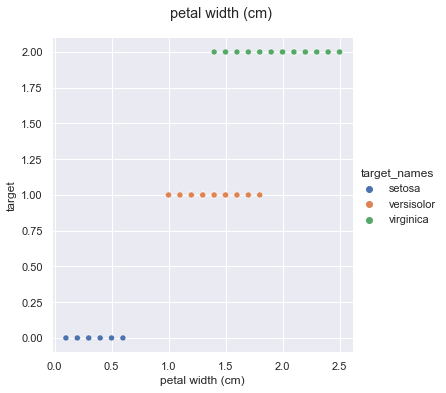

In [30]:
col = 'petal width (cm)'
sns.relplot(x=col, y='target', hue='target_names', data=df)
_ = plt.suptitle(col, y=1.05)

# Exploratory Data Analysis (EDA) - Pairplots

C:\Users\poncest\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\poncest\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\poncest\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


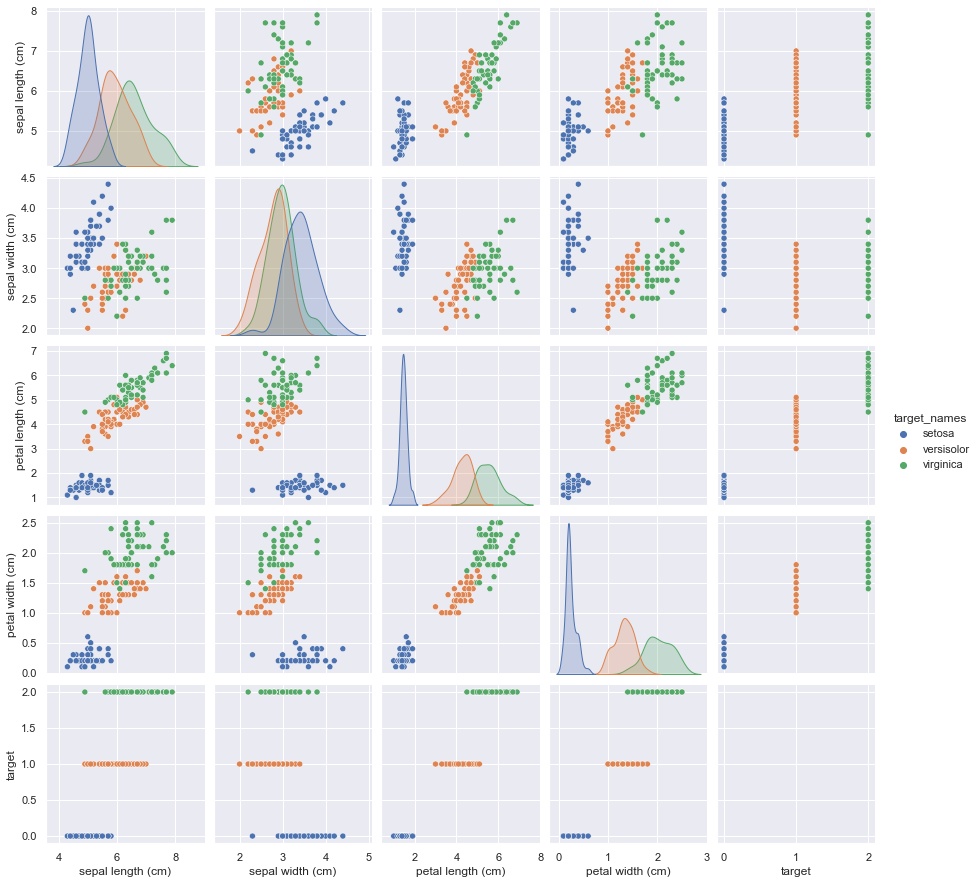

In [31]:
sns.pairplot(df, hue='target_names')

# Train test split
You always want to evaluate you final model on a test set that hasn't been used at all in the training process.  So we'll split off a test here.

(Note: This might be a little less true if you use cross validation but is considered a best practice)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# 75% test data (training)
df_train, df_test = train_test_split(df, test_size=0.25)

In [34]:
# train data (112 rows, 6 columns)
df_train.shape

(112, 6)

In [35]:
# test data (38 rows, 6 columns)
df_test.shape

(38, 6)

In [36]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
101,5.8,2.7,5.1,1.9,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
85,6.0,3.4,4.5,1.6,1,versisolor
33,5.5,4.2,1.4,0.2,0,setosa


# Prepare the data for modeling
This involves splitting the data back into plain Numpy arrays

In [37]:
# removigng the columns we don't want
# target will be the label - what we are trying to predict
x_train = df_train.drop(columns=['target', 'target_names']).values

In [38]:
x_train[:5]

array([[5.8, 2.7, 5.1, 1.9],
       [4.8, 3.1, 1.6, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.5, 4.2, 1.4, 0.2]])

In [39]:
# target is the output we want to model
y_train = df_train['target'].values

In [40]:
y_train[:5]

array([2, 0, 0, 1, 0])

# Modeling - What is our baseline?

What is the simplest model we can think of?

In this case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point, we would expect to have a model accuracy of 0.33, since we have 3 different classes that are evenly balanced.

So our models should at least beat 0.33 accuracy

# Modeling - Simple manual model

Let's manually look at our data and decide some cutoff points for classification using petal length (cm).

In [41]:
# decision tree model
def single_feature_prediction(petal_length):
    '''Predicts the Iris species given the petal length'''
    if petal_length < 2.5:
        return 0                      # setosa index
    elif petal_length < 4.8:
        return 1                      # vesicolor
    else:
        return 2                      # virginica

In [42]:
# petal length 
x_train[:, 2]

array([5.1, 1.6, 1.4, 4.5, 1.4, 1.4, 4. , 4. , 4.6, 5.3, 1.3, 1.6, 5.2,
       3.7, 1.5, 1.3, 4.2, 1.4, 1.6, 5. , 1.4, 3.3, 1.4, 6.6, 3.3, 1.4,
       4.7, 4.9, 4.8, 4.4, 1.5, 4.2, 4.4, 6. , 5.6, 1.5, 4.8, 6.7, 5.5,
       4.1, 1.7, 1.3, 5.2, 4.3, 1.7, 4.5, 4.5, 4.8, 1.1, 5.8, 6.3, 4.7,
       1.5, 5.4, 5.3, 4.7, 5.9, 5.4, 5.5, 1.3, 4.9, 1.4, 5.1, 1.9, 3.5,
       1.5, 4.4, 5.6, 1.4, 1.4, 5.6, 3.5, 1.4, 1.6, 1.4, 5.8, 1.4, 3.9,
       1.2, 1.3, 4.1, 5.7, 5.9, 4.9, 5.1, 5.1, 1.5, 5. , 4.1, 4.9, 4.5,
       4.6, 1.5, 4.4, 5.8, 4. , 4.8, 5. , 4. , 1.5, 1.6, 5.1, 5.7, 5.6,
       4.7, 5.5, 1.5, 4.2, 1.7, 5.6, 4.7, 4.5])

In [43]:
# python list comprehension
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:, 2]])

In [44]:
manual_y_predictions


array([2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1,
       0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1,
       0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 1])

In [45]:
y_train

array([2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1,
       0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1,
       0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 1])

In [46]:
manual_y_predictions == y_train


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [47]:
# how accurate the model is?
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [48]:
print(f'Manual model accuracy: {manual_model_accuracy * 100:.2f}%')

Manual model accuracy: 95.54%


# Modeling - Logistic Regression


In [49]:
from sklearn.linear_model import LogisticRegression

### Using a validation set to evaluate our model

In [50]:
model = LogisticRegression(max_iter=200)

In [51]:
# Xt stands for x_train, and Xv stands for x_validation
Xt, Xv, yt, yv = train_test_split(x_train, y_train, test_size = 0.25)

In [52]:
# trainig data points
Xt.shape

(84, 4)

In [53]:
# validation data points
Xv.shape

(28, 4)

In [54]:
# trained model prediction
model.fit(Xt, yt)

LogisticRegression(max_iter=200)

In [55]:
y_pred = model.predict(Xv)

In [56]:
# model accuracy
logistic_model_accuracy = np.mean(y_pred == yv)

In [57]:
print(f'Logistic model accuracy: {logistic_model_accuracy * 100:.2f}%')

Logistic model accuracy: 96.43%


In [58]:
# another way to determine model accuracy
model.score(Xv, yv)

0.9642857142857143

### Using cross-validation to evaluate our model


In [59]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [60]:
model = LogisticRegression(max_iter=200)

In [61]:
# cv = cross-validation generator
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

In [62]:
accuracies

array([0.95652174, 1.        , 1.        , 1.        , 0.86363636])

In [63]:
np.mean(accuracies)

0.9640316205533596

# Where are we misclassifying points?

In [64]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [65]:
predicted_correctly_mask = y_pred == y_train

In [66]:
not_predicted_correctly = ~predicted_correctly_mask

In [67]:
x_train[predicted_correctly_mask]

array([[5.8, 2.7, 5.1, 1.9],
       [4.8, 3.1, 1.6, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.5, 4.2, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.5, 2.3, 4. , 1.3],
       [6. , 2.2, 4. , 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [6.4, 3.2, 5.3, 2.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [5.5, 2.4, 3.7, 1. ],
       [5.3, 3.7, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.6, 1.4, 0.1],
       [5. , 2.3, 3.3, 1. ],
       [4.6, 3.2, 1.4, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.4, 3.3, 1. ],
       [5.1, 3.5, 1.4, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [7.2, 3.2, 6. , 1.8],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3

In [68]:
# only four datapoints not predicted corerctly (false)
predicted_correctly_mask


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [69]:
# only four datapoints not predicted corerctly
x_train[not_predicted_correctly]

array([[6.2, 2.8, 4.8, 1.8],
       [6. , 2.2, 5. , 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7]])

In [70]:
df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
101,5.8,2.7,5.1,1.9,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
85,6.0,3.4,4.5,1.6,1,versisolor
33,5.5,4.2,1.4,0.2,0,setosa
...,...,...,...,...,...,...
61,5.9,3.0,4.2,1.5,1,versisolor
23,5.1,3.3,1.7,0.5,0,setosa
136,6.3,3.4,5.6,2.4,2,virginica
56,6.3,3.3,4.7,1.6,1,versisolor


In [71]:
df_predictions = df_train.copy()

In [72]:
df_predictions['corrected_predictions'] = predicted_correctly_mask

In [73]:
df_predictions['prediction'] = y_pred

In [74]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,corrected_predictions,prediction
101,5.8,2.7,5.1,1.9,2,virginica,True,2
30,4.8,3.1,1.6,0.2,0,setosa,True,0
49,5.0,3.3,1.4,0.2,0,setosa,True,0
85,6.0,3.4,4.5,1.6,1,versisolor,True,1
33,5.5,4.2,1.4,0.2,0,setosa,True,0


In [75]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0: "setosa", 1: 'versisolor', 2: 'virginica'})

In [76]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,corrected_predictions,prediction,prediction_label
101,5.8,2.7,5.1,1.9,2,virginica,True,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa,True,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa,True,0,setosa
85,6.0,3.4,4.5,1.6,1,versisolor,True,1,versisolor
33,5.5,4.2,1.4,0.2,0,setosa,True,0,setosa


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

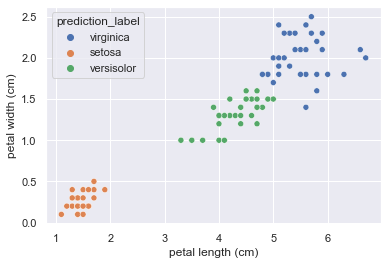

In [77]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='prediction_label', data=df_predictions)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

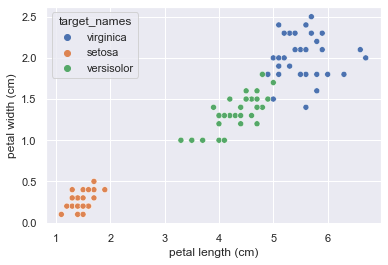

In [78]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target_names', data=df_predictions)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

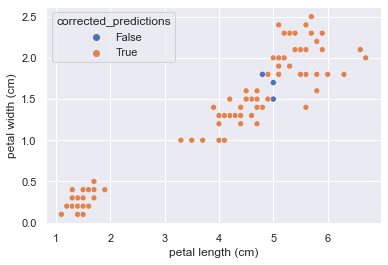

In [79]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='corrected_predictions', data=df_predictions)

In [80]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='target_names', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='corrected_predictions', data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

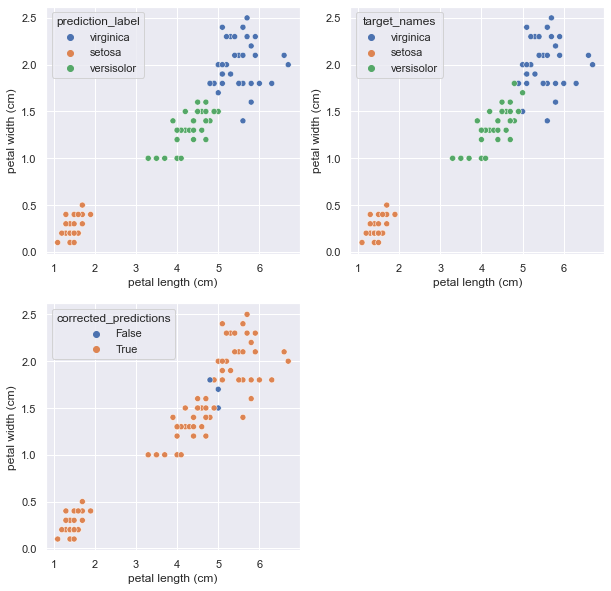

In [81]:
plot_incorrect_predictions(df_predictions, 'petal length (cm)', 'petal width (cm)')

# Model Tuning

Model tuning is trying to determine the parameters of your model ('hyperparameters') that maximize the model performance.

In [82]:
model = LogisticRegression(max_iter=200, C=1)

In [83]:
# searching  for the best value for C - training dataset

for reg_param in (0.1,0.5,1.0,1.8,1.9,2.0,2.1,2.2,2.3,3,5):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring = 'accuracy')
    print(f' Accuracy: {np.mean(accuracies) * 100:.2f}%')



0.1
 Accuracy: 92.85%
0.5
 Accuracy: 96.40%
1.0
 Accuracy: 96.40%
1.8
 Accuracy: 96.40%
1.9
 Accuracy: 96.40%
2.0
 Accuracy: 96.40%
2.1
 Accuracy: 96.40%
2.2
 Accuracy: 96.40%
2.3
 Accuracy: 96.40%
3
 Accuracy: 97.27%
5
 Accuracy: 97.27%


# Final Model

In [84]:
model = LogisticRegression(max_iter=200, C=2)

# How well does our model do test on the Test Set?

In [85]:
# removigng the columns we don't want
# target will be the label - what we are trying to predict
x_test = df_test.drop(columns=['target', 'target_names']).values
x_test.shape

(38, 4)

In [86]:
# target is the output we want to model
y_test = df_test['target'].values
y_test.shape

(38,)

###  Train our final model using our full Training Dataset

In [87]:
model.fit(x_train, y_train)

LogisticRegression(C=2, max_iter=200)

In [88]:
y_test_pred = model.predict(x_test)

In [89]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accurcy = np.mean(test_set_correctly_classified)

In [90]:
print(f'Test set accuracy: {test_set_accurcy * 100:.2f}')

Test set accuracy: 94.74


In [91]:
# Training accuracy
# How does the training dataset accuracy compares to the test dataset?
np.mean(accuracies) * 100

97.27272727272727

In [92]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [93]:
df_predictions_test = df_test.copy()
df_predictions_test['corrected_predictions'] = test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0: "setosa", 1: 'versisolor', 2: 'virginica'})

In [94]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,corrected_predictions,prediction,prediction_label
51,6.4,3.2,4.5,1.5,1,versisolor,True,1,versisolor
22,4.6,3.6,1.0,0.2,0,setosa,True,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica,True,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica,True,2,virginica
38,4.4,3.0,1.3,0.2,0,setosa,True,0,setosa


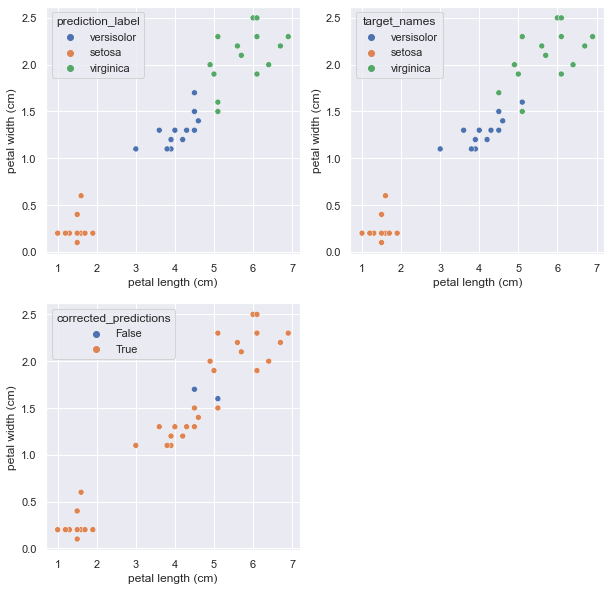

In [95]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature='petal length (cm)', y_axis_feature='petal width (cm)')

# Conclusion

We achieved a 97.4% accuracy on the test dataset using a Logistic Regression model with these parameters:


LogisticRegression(C=2, max_iter=200)


